In [1]:
import matplotlib.pyplot as plt
import darwin
import pandas as pd
from importlib import reload
import salem
reload(salem)
reload(darwin)
var = 'prcp'

if "ls_prcp" in locals():
    del ls_prcp
files = darwin.glob_measurements()
ls_prcp = darwin.open_experiment(
    experiment = 'rc_trop_ls', 
    variable = var, 
    year = '2022',
    engine="xarray",
    decode_cf=True
)

ImportError: cannot import name 'extract_xml_metadata' from 'io' (/home/ben/.pyenv/versions/3.10.4/lib/python3.10/io.py)

In [22]:
xml_meta = darwin.glob_metadata(suffix='.xml')
meta = pd.read_xml(xml_meta[1], xpath='.//coverage')
meta

,scope,temporalCoverage,geographicCoverage
0,document,NaN,NaN


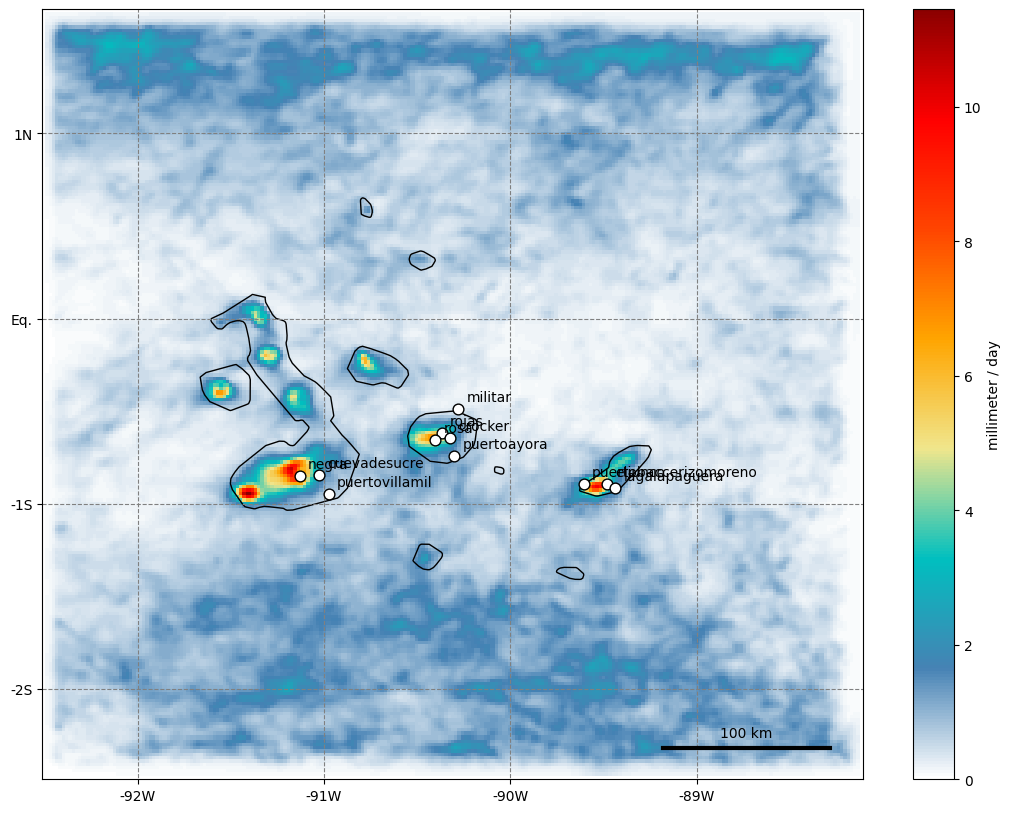

In [145]:
reload(darwin)
fig, ax = plt.subplots(figsize=(12,10))
# ls_prcp.plot_map(ax=ax, )
# ls_prcp.add_extracted_simulated_points_from_file(f"/home/ben/projects/darwin/{var}_bil.csv")
# ls_prcp.plot_stations(save=True)
ls_prcp.plot_map(ax=ax, aggregation="mean", save=True)
# plt.savefig("rc_trop_ls_ws10_map.png")
# del ls_prcp.wrf_product.attrs["PROJ_ENVI_STRING"]
# ls_prcp.wrf_product.salem.quick_map()
plt.show()

In [8]:
measured = pd.read_csv(f"/home/ben/projects/darwin/{var}_bil.csv", index_col=0)
measured.head()

,minasrojas,militar,puertoayora,puertovillamil,puertobaccerizomoreno,eljunco,lagalapaguera,cuevadesucre,negra,crocker,rosa
datetime,,,,,,,,,,,
2022-04-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-04-02,0.016045,0.018027,0.018412,0.018166,0.017155,0.017034,0.017570,0.017164,0.015393,0.016490,0.016665
2022-04-03,0.015988,0.018128,0.018365,0.018044,0.016841,0.015844,0.016804,0.016779,0.015767,0.016379,0.016575
2022-04-04,0.016440,0.018300,0.018353,0.017852,0.017905,0.017250,0.018085,0.016770,0.015905,0.016494,0.016788
2022-04-05,0.016386,0.018168,0.018411,0.017775,0.016642,0.016663,0.017286,0.016742,0.015644,0.016662,0.016811


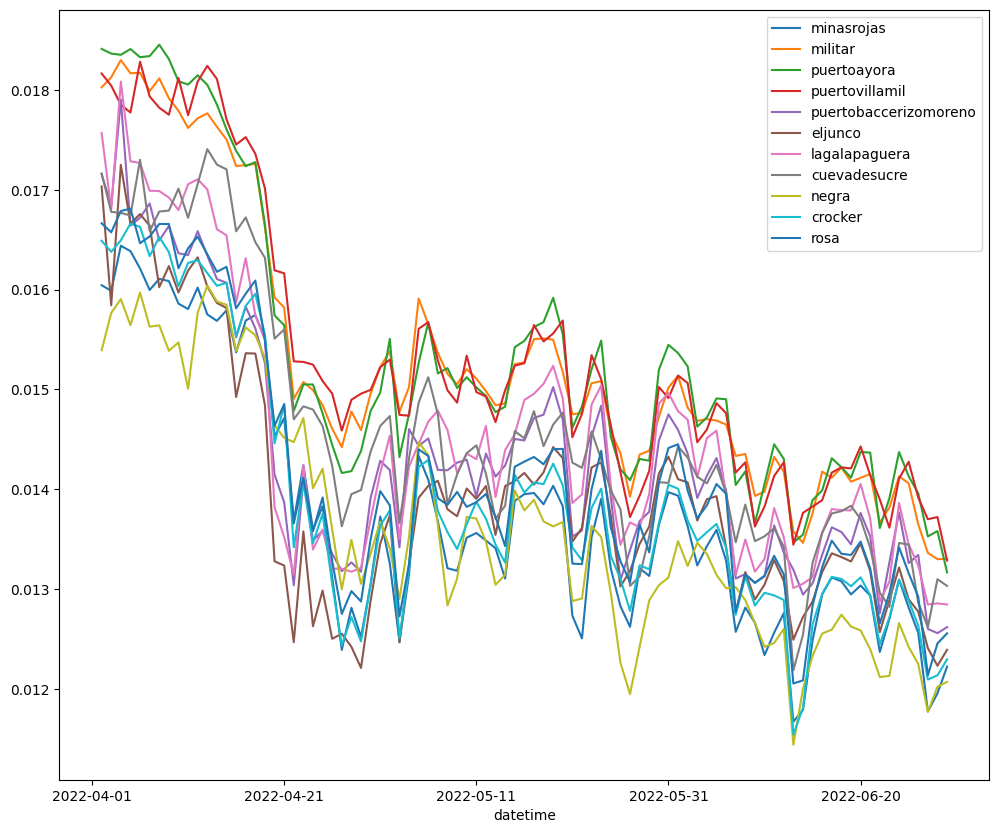

In [11]:
_, ax = plt.subplots(figsize=(12, 10))
measured.plot(ax=ax)
plt.savefig('stations_extracted_q2.png')

KeyError: 'W'

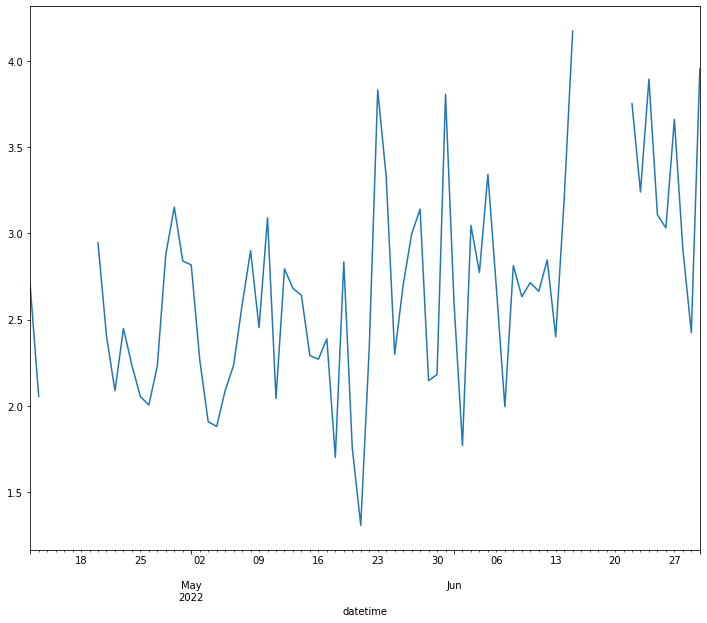

In [104]:
ls_prcp.plot_stations(save=True)

In [51]:
ls_prcp.measurements["militar"].columns

Index(['PCP_diffmin_radar'], dtype='object')

In [138]:
'+proj=merc +lat_0=2 +lon_0=-89.5 +k=1 +x_0=0 +y_0=00 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'

path="/home/ben/data/darwin_measured/26_AWS-PPuertoAyora_complete/26_xxxxxx_xxxxx_puertoayora_l2_complete.csv"

ds = pd.read_csv(path, parse_dates=['datetime'], index_col=['datetime'])
ds = ds.loc['2022-04-01':'2022-06-30']
ds.head()

In [51]:
temp = ds["T"].resample('D').mean()
q = ds["RH"].resample('D').mean()
PCP_diff_radar = ds['PCP_diff_radar'].resample('D').sum()

In [67]:
files = glob("/home/ben/data/darwin_measured/??_AWS*/*[!xlsx_complete]")
files = [file for file in files if not file.count("xlsx") and not file.count("_-_")]

In [13]:
import pandas as pd
ds = pd.read_csv("/home/ben/data/darwin_measured/26_AWS-PPuertoAyora_complete/26_xxxxxx_xxxxx_puertoayora_l2_complete.csv", parse_dates=['datetime'], index_col=['datetime'])
ds = ds.loc['2022-04-01':'2022-06-30']
ds.head()
temp = ds["T"].resample('D').mean()
q = ds["RH"].resample('D').mean()
PCP_diff_radar = ds['PCP_diff_radar'].resample('D').sum()

In [15]:
ls_prcp.measurements_files

['/home/ben/data/darwin_measured/28_AWS-PMilitar_complete/28_202203241020_202206221200_militar_l2_complete.csv',
 '/home/ben/data/darwin_measured/18_AWS-PLaGalapaguera_complete/18_202203261600_202205191140_lagalapaguera_l2_complete.csv',
 '/home/ben/data/darwin_measured/29_AWS-RMinasRojas_complete/29_xxxxxx_xxxxx_minasrojas_l1_complete.csv',
 '/home/ben/data/darwin_measured/30_AWS-PMinasRojas_complete/30_xxxxxx_xxxxx_minasrojas_l2_complete.csv',
 '/home/ben/data/darwin_measured/14_AWS-PSierraNegra_complete/14_202203200730_202203150830_sierra_negra_l2_complete.csv',
 '/home/ben/data/darwin_measured/21_AWS-RPuertoBaquerizoMoreno_complete/21_202203111230_202205181350_puertobacceriomoreno_l1_complete.csv',
 '/home/ben/data/darwin_measured/26_AWS-PPuertoAyora_complete/26_xxxxxx_xxxxx_puertoayora_l2_complete.csv',
 '/home/ben/data/darwin_measured/24_AWS-PPuertoVillamil_complete/24_xxxxxx_xxxxx_puertovillamil_l2_complete.csv',
 '/home/ben/data/darwin_measured/10_AWS-RCerroCrocker_complete/10_

In [18]:
import xarray as xr
def open_dataset(file, pyproj_srs='+proj=merc +lat_0=2 +lon_0=-89.5 +k=1 +x_0=0 +y_0=00 +ellps=WGS84 +datum=WGS84 +units=m +no_defs'):
    ds = xr.open_dataset(
        file,
        decode_cf=False
    )
    split = file.split('/')[-1].split('_')
    var = split[-2]
    if var == 'lu':
        var = split[-2] + '_' + split[-1].split('.')[0]
    ds[var].attrs['pyproj_srs'] = pyproj_srs
    return ds

In [36]:
reload(darwin)
ds = darwin.WrfDataset(ds)

/home/ben/.pyenv/versions/3.9.9/lib/python3.9/abc.py:106: FutureWarning: xarray subclass WrfDataset should explicitly define __slots__
  cls = super().__new__(mcls, name, bases, namespace, **kwargs)


NameError: name 'ds' is not defined

In [37]:
from metpy.calc import relative_humidity_from_mixing_ratio
from metpy.units import units
q2 = open_dataset("/home/ben/data/GAR/rc_trop_ls/products/d02/d/2d/rc_trop_ls_d10km_d_2d_q2_2022.nc")
t2 = open_dataset("/home/ben/data/GAR/rc_trop_ls/products/d02/d/2d/rc_trop_ls_d10km_d_2d_t2_2022.nc")
psfc = open_dataset("/home/ben/data/GAR/rc_trop_ls/products/d02/d/2d/rc_trop_ls_d10km_d_2d_psfc_2022.nc")
q2 = q2["q2"] * units("kg/kg")
t2 = t2["t2"] * units("K")
psfc = psfc["psfc"] * units("mbar")

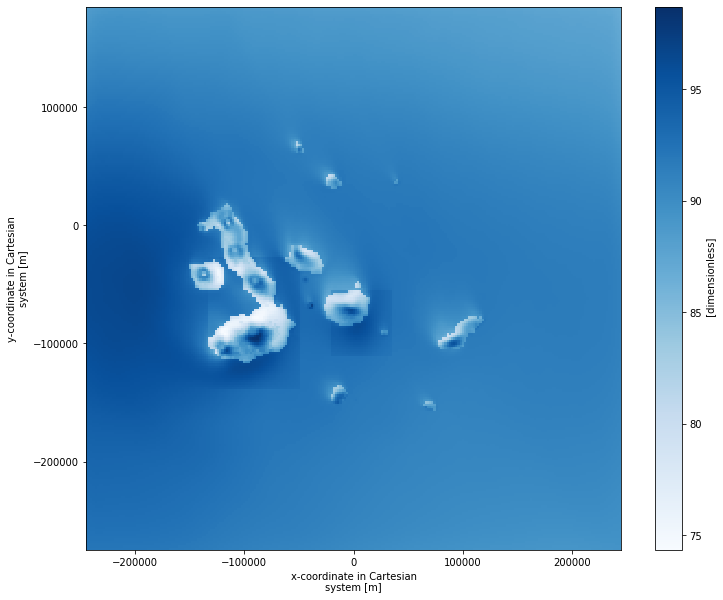

In [97]:
rh = relative_humidity_from_mixing_ratio(psfc, t2, q2)
fig, ax = plt.subplots(figsize=(12, 10))
rh.mean(dim="time", skipna=True, keep_attrs=True).plot(ax=ax, cmap="Blues")
ax.xlabel=""
ax.ylabel=""
plt.savefig("rc_trop_ls_rh_map.png")
plt.show()